# Main

In [93]:
import sys
sys.path.append('/usr/local/lib/python3.5/site-packages')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import os


In [94]:
# Leemos el archivo
myFolder = (os.getcwd()) # busca en el directorio actual

#Acá paso los datos a una lista de strings y recorro todos
#L=['4','16','32','64','128'];
L=['4','16'];


#-----cosas para graficar: 
#----A determinar Pc(inf), nu y tau
#Pc vs L ╬
#Pc vs dispersión
#Determinar nu (franco lo hace con log(Pc(L)-Pc(inf))) vs log L
#F(p) vs p
            
#----B determinar D (dimensión fractal)
#log(ns) vs log(s)
#chi^2 vs p

#----C obtener beta a partir de la P(inf)
#log M vs log L, donde M es la masa
#Pinf(p) vs (p-pc)
#log(Pinf(p)) vs log (p-pc)


# Ejercicio 1.

In [95]:
pc_mean = [];
pc_std = [];
pc_L =[]; 
#quiero promediar mis pc para cada L
for i,l in enumerate(L):
#l='4'
    with open ('datos_p_L='+l+'.txt', 'r') as mf: 
        myfile=mf.read()
        datos = [float(i) for i in myfile.split(' ')[:-3] if i.strip()];
        pc_mean= np.mean(datos);
        pc_std=np.std(datos);
        ls=[int(l), pc_mean, pc_std];
        
    pc_L.append(ls)
    mf.close()


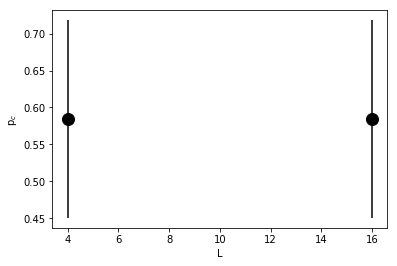

In [96]:
#grafiquemos
name='pcvsL'
plt.figure()
for i in range(0,len(pc_L)):
    plt.plot(pc_L[i][0],pc_L[i][1],'ko', markersize=12)
    plt.errorbar(pc_L[i][0],pc_L[i][1],pc_L[i][2],ecolor='k')
    
plt.xlabel('L')
plt.ylabel('p$_{{c}}$')
#plt.legend()
#plt.title(name)

plt.savefig(name+'_grafico.png')
plt.show()


# Ejercicio 2.

In [115]:
probabilidad_L = [];
fz_percolante_L =[];
percola_L = [];
ns_L = [];
prob_total =[]; #esto sería una lista de listas donde cada elemento es el archivo
fz_perc_total =[];
ns_total = [];
datos=[];

for l in L:
    with open ('Tablas_L='+l+'.txt', 'rt') as myfile: # Open lorem.txt for reading text data.
        mylines = [];
        for myline in myfile: # For each line, stored as myline,
            print(myline)
            mylines.append(myline)
            datos = [i for i in myline.split(' ')[:-2] if i.strip()];
            #datos = [i for i in myline.split(' ')[:-1] if i.strip()] 
            largo=len(datos);           #tomo la primera, pero todas tienen misma cantidad de elementos
            #print(datos[0])
            probabilidad_L.append(datos[0]);

            if (datos[1] != '-nan'):
                fz_percolante_L.append(datos[1]); #aca hay que tener cuidado con la probabilidad percolante, xq aparece NaN         

            for j in range(2,largo):    #para el resto de los elementos que son los ns
                ns_L.append(datos[0]);
                ns_L.append(datos[j]);                 
        
    prob_total.append(probabilidad_L)
    fz_perc_total.append(fz_percolante_L);
    ns_total.append(ns_L);

print(prob_total)
print(fz_perc_total)
print(ns_total)
myfile.close()

0.000000 -nan 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 

0.010000 8.000000 0.002000 0.000000 0.144000 0.004000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 

0.020000 7.000000 0.002000 0.000000 0.310000 0.006000 0.002000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 

0.030000 8.000000 0.002000 0.000000 0.488001 0.020000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 

0.040000 8.000000 0.002000 0.000000 0.536000 0.036000 0.004000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 

0.050000 7.000000 0.002000 0.000000 0.648000 0.060000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.00

IndexError: list index out of range

In [129]:
#for i,l in enumerate(L):
l='4';

with open('Tablas_L='+l+'.txt', 'r') as mf: 
    myfile=mf.read()
    datos = [float(i) for i in myfile.split(' ')[:-1] if i.strip()];
    largo=len(datos);           #tomo la primera, pero todas tienen misma cantidad de elementos
    probabilidad_L.append(datos[0]);

    if (datos[1] != '-nan'):
        fz_percolante_L.append(datos[1]); #aca hay que tener cuidado con la probabilidad percolante, xq aparece NaN         

    for j in range(2,largo):    #para el resto de los elementos que son los ns
        ns_L.append(datos[0]);
        ns_L.append(datos[j]);                 

prob_total.append(probabilidad_L)
fz_perc_total.append(fz_percolante_L);
ns_total.append(ns_L);

print(prob_total)
print(fz_perc_total)
print(ns_total)
mf.close()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

